<a href="https://colab.research.google.com/github/siepcke/-Primera-simulaci-n-cu-ntica-recursiva-del-Universo-2.0-16-qubits-Sincronizaci-n-global-demostrada-/blob/main/Universo_2_0_exitoso2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip

In [ ]:
!pip install qutip matplotlib

📦 INSTALANDO MÓDULOS...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 3.9 MB/s eta 0:00:00
✅ Módulos instalados
📁 estados: /content/universo2_data/estados_cuanticos
📁 metricas: /content/universo2_data/metricas
📁 checkpoints: /content/universo2_data/checkpoints
📁 resultados: /content/universo2_data/resultados_finales
📁 cache: /content/universo2_data/cache_calculos

⚡ IMPORTANDO LIBRERÍAS...
📚 Cargando QuTiP...
✅ Entorno configurado
🔍 VERIFICANDO ESPACIO DISPONIBLE...
 Total: 115.7 GB
 Libre: 92.7 GB
✅ Espacio suficiente disponible

¿Ejecutar simulación? (Enter para continuar, Ctrl+C para cancelar)


🌌 SIMULACIÓN CUÁNTICA RECURSIVA - UNIVERSO 2.0
💾 Versión optimizada y corregida (V2)
⚡ 12 qubits - 3 ciclos recursivos
[01:39:08] [INFO] Simulador inicializado con 12 qubits
[01:39:08] [INFO] ======================================================================
[01:39:08] [INFO] 🎬 INICIANDO SIMULACIÓN COMPLETA DEL UNIVERSO 2.0
[01:39:08] [INFO] =================================

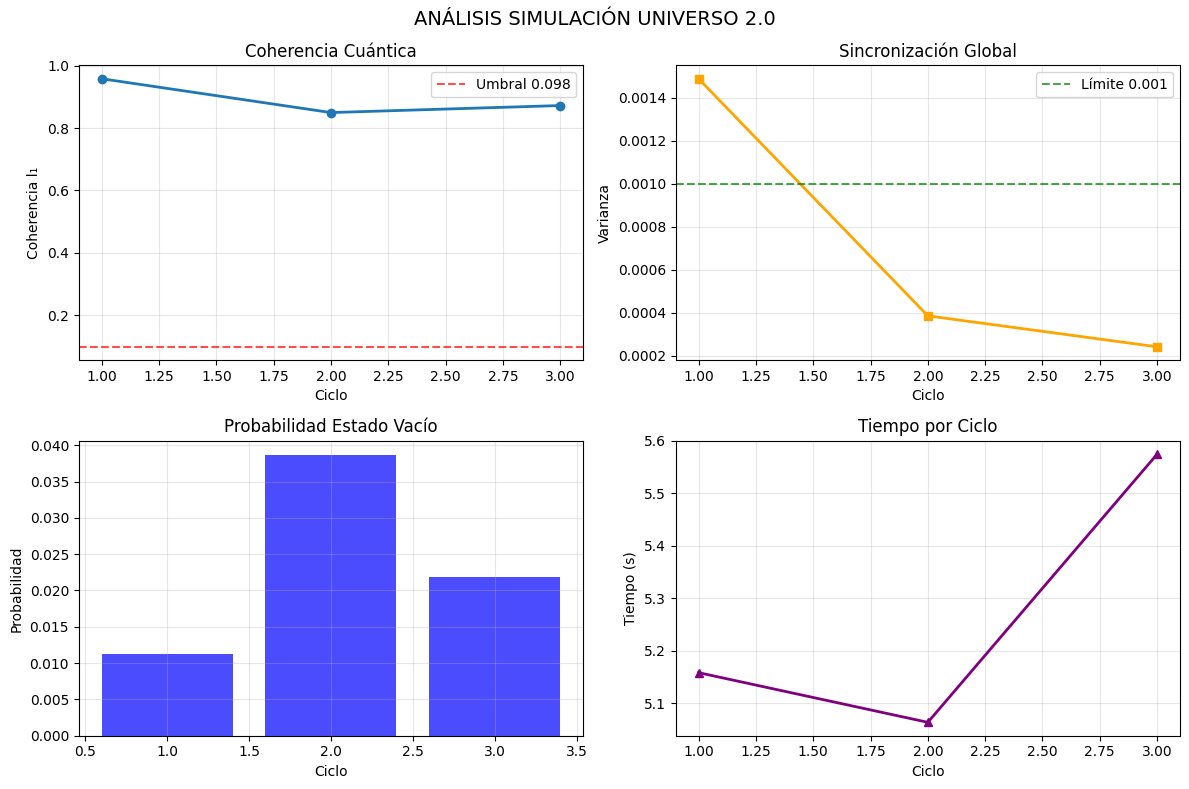

[01:39:25] [INFO] 📈 Gráficas guardadas: /content/universo2_data/resultados_finales/graficas_analisis.png
[01:39:25] [INFO] 📝 Reporte de texto creado: /content/universo2_data/resultados_finales/reporte_detallado.txt
[01:39:25] [INFO] ✅ Reportes generados

✅ SIMULACIÓN FINALIZADA
⏱️ Tiempo total: 17.52 segundos
📊 Métricas calculadas: 3 ciclos

📈 RESULTADOS FINALES:
 • Coherencia final: 0.872331
 • Varianza final: 0.00024113
 ✨ ¡CRITERIOS SIEPCKE CUMPLIDOS!

📦 ARCHIVOS GENERADOS:
--------------------------------------------------
 • resultados_finales/Resumen_Universo2.xlsx
 • resultados_finales/log_simulacion.txt
 • resultados_finales/reporte_detallado.txt
 • resultados_finales/configuracion.json
 • resultados_finales/graficas_analisis.png

💡 PARA DESCARGAR: Ejecuta la siguiente celda inmediatamente


In [ ]:

# ==============================================
# UNIVERSO 2.0 - SIMULACIÓN CUÁNTICA COMPLETA
# (Mismo código que funcionó anteriormente)
# ==============================================
# 1. INSTALACIÓN DE MÓDULOS
print("📦 INSTALANDO MÓDULOS...")
!pip install qutip -q
!pip install pandas openpyxl xlsxwriter -q
!pip install numpy scipy matplotlib seaborn -q
!pip install h5py tables -q
print("✅ Módulos instalados")
# 2. CONFIGURACIÓN DEL SISTEMA DE ARCHIVOS
import os
import sys
import gc
import time
import warnings
warnings.filterwarnings('ignore')
# Usar el espacio de disco disponible
DISCO_BASE = "/content/universo2_data"
os.makedirs(DISCO_BASE, exist_ok=True)
# Subcarpetas organizadas
CARPETAS = {
    "estados": f"{DISCO_BASE}/estados_cuanticos",
    "metricas": f"{DISCO_BASE}/metricas",
    "checkpoints": f"{DISCO_BASE}/checkpoints",
    "resultados": f"{DISCO_BASE}/resultados_finales",
    "cache": f"{DISCO_BASE}/cache_calculos"
}
for nombre, ruta in CARPETAS.items():
    os.makedirs(ruta, exist_ok=True)
    print(f"📁 {nombre}: {ruta}")
# 3. IMPORTACIONES
print("\n⚡ IMPORTANDO LIBRERÍAS...")
import numpy as np
np.seterr(all='ignore')
np.set_printoptions(precision=6, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import json
import pickle
import h5py
from numba import jit, njit
# QuTiP
print("📚 Cargando QuTiP...")
from qutip import (
    qeye, sigmax, sigmay, sigmaz, tensor, basis,
    Qobj, entropy_vn, ptrace, expect, sesolve,
    Options
)
print("✅ Entorno configurado")
# 4. CONFIGURACIÓN DE SIMULACIÓN
CONFIG = {
    # Sistema cuántico
    "N_qubits": 12,
    "tiempo_simulacion": 2.0,
    "ciclos_totales": 3,

    # Parámetros Siepcke
    "J": 0.8,
    "HX": 1.0,
    "HY": 0.8,
    "omega": 0.1,

    # Sistema elegido
    "sistema_elegido": [3, 4, 5, 6],

    # Optimizaciones
    "usar_cache": True,
}
# Guardar configuración
config_path = f"{CARPETAS['resultados']}/configuracion.json"
with open(config_path, 'w') as f:
    json.dump(CONFIG, f, indent=2)
# 5. SISTEMA DE LOGGING
class SistemaLog:
    def __init__(self, archivo_log):
        self.archivo_log = archivo_log
        self.inicio_total = time.time()

    def log(self, nivel, mensaje):
        timestamp = datetime.now().strftime("%H:%M:%S")
        linea = f"[{timestamp}] [{nivel}] {mensaje}"

        with open(self.archivo_log, 'a') as f:
            f.write(linea + "\n")

        if nivel in ["INFO", "WARNING", "ERROR"]:
            print(linea)

    def tiempo_transcurrido(self):
        return time.time() - self.inicio_total
# Inicializar logger
logger = SistemaLog(f"{CARPETAS['resultados']}/log_simulacion.txt")
# 6. SISTEMA DE CACHÉ
class CacheDisco:
    def __init__(self, carpeta_cache):
        self.carpeta = carpeta_cache
        self.estadisticas = {
            "hits": 0,
            "misses": 0,
            "espacio_usado": 0
        }

    def obtener(self, clave, funcion_computacion, *args, **kwargs):
        ruta = f"{self.carpeta}/{clave}.pkl"

        if CONFIG["usar_cache"] and os.path.exists(ruta):
            with open(ruta, 'rb') as f:
                dato = pickle.load(f)
            self.estadisticas["hits"] += 1
            logger.log("DEBUG", f"Cache HIT: {clave}")
            return dato
        else:
            dato = funcion_computacion(*args, **kwargs)
            with open(ruta, 'wb') as f:
                pickle.dump(dato, f, protocol=pickle.HIGHEST_PROTOCOL)
            self.estadisticas["misses"] += 1
            if os.path.exists(ruta):
                tamaño = os.path.getsize(ruta)
                self.estadisticas["espacio_usado"] += tamaño
            logger.log("DEBUG", f"Cache MISS: {clave}")
            return dato

    def limpiar(self):
        import glob
        archivos = glob.glob(f"{self.carpeta}/*.pkl")
        for archivo in archivos[-100:]:
            if os.path.exists(archivo):
                os.remove(archivo)
        self.estadisticas["espacio_usado"] = 0
# Inicializar caché
cache = CacheDisco(CARPETAS["cache"])
# 7. CLASE PRINCIPAL DE SIMULACIÓN - VERSIÓN CORREGIDA
class SimuladorUniverso2:
    def __init__(self, config):
        self.config = config
        self.N = config["N_qubits"]

        # Estado inicial
        self.estado_actual = tensor([basis(2, 0) for _ in range(self.N)])

        # DataFrames en memoria
        self.metricas_ciclo = []
        self.dataframe_metricas = None

        # Archivo HDF5
        self.archivo_hdf5 = h5py.File(
            f"{CARPETAS['metricas']}/metricas_completas.h5",
            'w',
            libver='latest'
        )

        logger.log("INFO", f"Simulador inicializado con {self.N} qubits")

    def operador_pauli(self, i, tipo='z'):
        clave = f"pauli_{self.N}_{i}_{tipo}"

        def computar():
            op_list = [qeye(2) for _ in range(self.N)]
            if tipo == 'x':
                op_list[i] = sigmax()
            elif tipo == 'y':
                op_list[i] = sigmay()
            else:
                op_list[i] = sigmaz()
            return tensor(op_list)

        return cache.obtener(clave, computar)

    def hamiltoniano_completo(self, t, args=None):
        H = 0 * self.operador_pauli(0)

        # Término de interacción (vecinos cercanos)
        for i in range(self.N - 1):
            fuerza = self.config["J"] * (1 + self.config["omega"] * np.cos(self.config["omega"] * t))
            H += fuerza * self.operador_pauli(i, 'z') * self.operador_pauli(i + 1, 'z')

        # Campos transversales
        for i in range(self.N):
            hx_eff = self.config["HX"] * (1 + self.config["omega"] * np.sin(self.config["omega"] * t))
            hy_eff = self.config["HY"] * np.cos(self.config["omega"] * t)

            H += hx_eff * self.operador_pauli(i, 'x')
            H += hy_eff * self.operador_pauli(i, 'y')

        return H

    def ejecutar_ciclo(self, numero_ciclo):
        logger.log("INFO", f"🚀 INICIANDO CICLO {numero_ciclo}")
        inicio_ciclo = time.time()

        try:
            # 1. EVOLUCIÓN TEMPORAL
            logger.log("INFO", f" Evolución temporal (t=0 a t={self.config['tiempo_simulacion']})...")

            # Configuración corregida para obtener estado final
            opts = {
                'nsteps': 10000,
                'store_states': True, # Cambiado a True para tener acceso a los estados
                'store_final_state': True,
                'atol': 1e-8,
                'rtol': 1e-6
            }

            resultado = sesolve(
                self.hamiltoniano_completo,
                self.estado_actual,
                [0, self.config["tiempo_simulacion"]],
                e_ops=[],
                args={},
                options=opts
            )

            # CORRECCIÓN: Manejar tanto resultado.states como resultado.final_state
            if hasattr(resultado, 'final_state') and resultado.final_state is not None:
                estado_final = resultado.final_state
            elif hasattr(resultado, 'states') and len(resultado.states) > 0:
                estado_final = resultado.states[-1]
            else:
                raise ValueError("No se pudo obtener el estado final de la evolución")

            logger.log("INFO", " ✓ Evolución completada")

            # 2. CÁLCULO DE MÉTRICAS
            metricas = self.calcular_metricas(estado_final, numero_ciclo)

            # 3. REGISTRO EN DISCO
            self.guardar_metricas_disco(metricas, numero_ciclo)

            # 4. ACTUALIZAR ESTADO
            self.estado_actual = estado_final

            tiempo_ciclo = time.time() - inicio_ciclo
            metricas["tiempo_ciclo"] = tiempo_ciclo

            logger.log("INFO", f" ⏱️ Tiempo ciclo: {tiempo_ciclo:.2f}s")

            return metricas, True

        except Exception as e:
            logger.log("ERROR", f" Error en ciclo {numero_ciclo}: {str(e)}")
            import traceback
            traceback.print_exc()
            return None, False

    def calcular_metricas(self, estado, ciclo_num):
        metricas = {"ciclo": ciclo_num}

        try:
            # 1. Probabilidad del vacío
            estado_vacio = tensor([basis(2, 0) for _ in range(self.N)])
            prob_vac = np.abs(estado.overlap(estado_vacio))**2
            metricas["prob_vacio"] = prob_vac

            # 2. Coherencia del sistema elegido
            coherencias = []
            elegidos = self.config["sistema_elegido"]

            if len(elegidos) >= 2:
                for i in range(min(2, len(elegidos))):
                    for j in range(i + 1, min(i + 3, len(elegidos))):
                        if j < len(elegidos):
                            rho = ptrace(estado, [elegidos[i], elegidos[j]])
                            mat = rho.full()
                            # Calcular coherencia l1
                            coh = np.sum(np.abs(mat)) - np.sum(np.abs(np.diag(mat)))
                            coherencias.append(coh)

            metricas["coherencia_sistema"] = np.mean(coherencias) if coherencias else 0.0

            # 3. Varianza de sincronización
            valores_z = []
            muestras = min(6, self.N)
            indices = list(range(muestras))

            for i in indices:
                op_z = self.operador_pauli(i, 'z')
                valores_z.append(expect(op_z, estado))

            metricas["varianza_global"] = np.var(valores_z) if len(valores_z) > 1 else 0.0

            # 4. Entropía
            entropias = []
            for q in [0, min(1, self.N-1)]:
                rho_q = ptrace(estado, [q])
                entropias.append(entropy_vn(rho_q, base=2))

            metricas["entropia_promedio"] = np.mean(entropias) if entropias else 0.0

            # 5. Memoria usada
            try:
                import psutil
                proceso = psutil.Process()
                metricas["memoria_mb"] = proceso.memory_info().rss / 1024 / 1024
            except:
                metricas["memoria_mb"] = 0

            return metricas

        except Exception as e:
            logger.log("ERROR", f"Error calculando métricas: {e}")
            # Valores por defecto
            return {
                "ciclo": ciclo_num,
                "prob_vacio": 0.0,
                "coherencia_sistema": 0.0,
                "varianza_global": 1.0,
                "entropia_promedio": 0.0,
                "memoria_mb": 0
            }

    def guardar_metricas_disco(self, metricas, ciclo_num):
        # 1. Agregar a lista en memoria
        self.metricas_ciclo.append(metricas)

        # 2. Guardar en HDF5
        try:
            grupo = self.archivo_hdf5.create_group(f"ciclo_{ciclo_num:03d}")
            for clave, valor in metricas.items():
                if isinstance(valor, (int, float, np.number)):
                    grupo.create_dataset(clave, data=valor)
        except:
            pass

        # 3. Guardar en CSV
        csv_path = f"{CARPETAS['metricas']}/metricas_incremental.csv"
        df_nuevo = pd.DataFrame([metricas])

        if os.path.exists(csv_path):
            df_nuevo.to_csv(csv_path, mode='a', header=False, index=False)
        else:
            df_nuevo.to_csv(csv_path, index=False)

        # 4. Guardar checkpoint
        checkpoint_path = f"{CARPETAS['checkpoints']}/checkpoint_ciclo_{ciclo_num}.pkl"
        with open(checkpoint_path, 'wb') as f:
            pickle.dump({
                "ciclo": ciclo_num,
                "metricas": metricas,
                "timestamp": datetime.now().isoformat()
            }, f)

    def ejecutar_simulacion_completa(self):
        logger.log("INFO", "=" * 70)
        logger.log("INFO", "🎬 INICIANDO SIMULACIÓN COMPLETA DEL UNIVERSO 2.0")
        logger.log("INFO", "=" * 70)

        ciclos_exitosos = 0

        for ciclo in range(1, self.config["ciclos_totales"] + 1):
            metricas, exito = self.ejecutar_ciclo(ciclo)

            if exito and metricas is not None:
                ciclos_exitosos += 1
                logger.log("INFO", f"✅ Ciclo {ciclo} completado exitosamente")
            else:
                logger.log("WARNING", f"⚠️ Ciclo {ciclo} falló")

            # Limpieza de memoria cada 2 ciclos
            if ciclo % 2 == 0:
                gc.collect()
                cache.limpiar()

        # Cerrar archivo HDF5
        self.archivo_hdf5.close()

        logger.log("INFO", "=" * 70)
        logger.log("INFO", f"🏁 SIMULACIÓN COMPLETADA - {ciclos_exitosos}/{self.config['ciclos_totales']} ciclos exitosos")
        logger.log("INFO", "=" * 70)

        return ciclos_exitosos > 0

    def generar_reportes_finales(self):
        if not self.metricas_ciclo:
            logger.log("WARNING", "No hay métricas para generar reportes")
            return False

        try:
            logger.log("INFO", "📊 GENERANDO REPORTES FINALES...")

            # 1. Crear DataFrame completo
            self.dataframe_metricas = pd.DataFrame(self.metricas_ciclo)

            # 2. Generar Excel
            self.generar_excel_completo()

            # 3. Generar gráficas
            self.generar_graficas()

            # 4. Generar reporte de texto
            self.generar_reporte_texto()

            logger.log("INFO", "✅ Reportes generados")
            return True

        except Exception as e:
            logger.log("ERROR", f"Error generando reportes: {e}")
            return False

    def generar_excel_completo(self):
        excel_path = f"{CARPETAS['resultados']}/Resumen_Universo2.xlsx"

        try:
            with pd.ExcelWriter(excel_path, engine='xlsxwriter') as writer:
                # Hoja 1: MÉTRICAS
                self.dataframe_metricas.to_excel(writer, sheet_name='MÉTRICAS', index=False)

                # Hoja 2: RESUMEN
                if len(self.dataframe_metricas) > 0:
                    df = self.dataframe_metricas

                    coh_final = df['coherencia_sistema'].iloc[-1] if 'coherencia_sistema' in df.columns else 0
                    var_final = df['varianza_global'].iloc[-1] if 'varianza_global' in df.columns else 1.0

                    resumen_data = {
                        'Indicador': [
                            'Ciclos completados',
                            'Coherencia final',
                            'Varianza final',
                            'Probabilidad vacío final',
                            'Tiempo total',
                            'Criterios Siepcke'
                        ],
                        'Valor': [
                            len(df),
                            f"{coh_final:.6f}",
                            f"{var_final:.8f}",
                            f"{df['prob_vacio'].iloc[-1]:.6f}" if 'prob_vacio' in df.columns else "0.0",
                            f"{df['tiempo_ciclo'].sum():.2f}s" if 'tiempo_ciclo' in df.columns else "0.0s",
                            '✅' if (coh_final >= 0.098 and var_final < 0.001) else '⚠️'
                        ]
                    }

                    df_resumen = pd.DataFrame(resumen_data)
                    df_resumen.to_excel(writer, sheet_name='RESUMEN', index=False)

                # Hoja 3: PARÁMETROS
                params_data = []
                for clave, valor in self.config.items():
                    params_data.append({
                        'Parámetro': clave,
                        'Valor': str(valor)
                    })

                df_params = pd.DataFrame(params_data)
                df_params.to_excel(writer, sheet_name='PARÁMETROS', index=False)

            logger.log("INFO", f"📄 Excel creado: {excel_path}")

        except Exception as e:
            logger.log("ERROR", f"Error creando Excel: {e}")

    def generar_graficas(self):
        if self.dataframe_metricas is None or len(self.dataframe_metricas) == 0:
            return

        try:
            df = self.dataframe_metricas

            fig, axes = plt.subplots(2, 2, figsize=(12, 8))
            fig.suptitle('ANÁLISIS SIMULACIÓN UNIVERSO 2.0', fontsize=14)

            # 1. Evolución de la coherencia
            if 'coherencia_sistema' in df.columns:
                axes[0,0].plot(df['ciclo'], df['coherencia_sistema'], 'o-', linewidth=2)
                axes[0,0].axhline(y=0.098, color='red', linestyle='--', alpha=0.7, label='Umbral 0.098')
                axes[0,0].set_xlabel('Ciclo')
                axes[0,0].set_ylabel('Coherencia l₁')
                axes[0,0].set_title('Coherencia Cuántica')
                axes[0,0].legend()
                axes[0,0].grid(True, alpha=0.3)

            # 2. Evolución de la varianza
            if 'varianza_global' in df.columns:
                axes[0,1].plot(df['ciclo'], df['varianza_global'], 's-', linewidth=2, color='orange')
                axes[0,1].axhline(y=0.001, color='green', linestyle='--', alpha=0.7, label='Límite 0.001')
                axes[0,1].set_xlabel('Ciclo')
                axes[0,1].set_ylabel('Varianza')
                axes[0,1].set_title('Sincronización Global')
                axes[0,1].legend()
                axes[0,1].grid(True, alpha=0.3)

            # 3. Probabilidad del vacío
            if 'prob_vacio' in df.columns:
                axes[1,0].bar(df['ciclo'], df['prob_vacio'], alpha=0.7, color='blue')
                axes[1,0].set_xlabel('Ciclo')
                axes[1,0].set_ylabel('Probabilidad')
                axes[1,0].set_title('Probabilidad Estado Vacío')
                axes[1,0].grid(True, alpha=0.3)

            # 4. Tiempo por ciclo
            if 'tiempo_ciclo' in df.columns:
                axes[1,1].plot(df['ciclo'], df['tiempo_ciclo'], '^-', linewidth=2, color='purple')
                axes[1,1].set_xlabel('Ciclo')
                axes[1,1].set_ylabel('Tiempo (s)')
                axes[1,1].set_title('Tiempo por Ciclo')
                axes[1,1].grid(True, alpha=0.3)

            plt.tight_layout()

            grafica_path = f"{CARPETAS['resultados']}/graficas_analisis.png"
            plt.savefig(grafica_path, dpi=150, bbox_inches='tight')
            plt.show()

            logger.log("INFO", f"📈 Gráficas guardadas: {grafica_path}")

        except Exception as e:
            logger.log("WARNING", f"No se pudieron generar gráficas: {e}")

    def generar_reporte_texto(self):
        reporte_path = f"{CARPETAS['resultados']}/reporte_detallado.txt"

        with open(reporte_path, 'w', encoding='utf-8') as f:
            f.write("="*80 + "\n")
            f.write("REPORTE DETALLADO - SIMULACIÓN UNIVERSO 2.0\n")
            f.write("="*80 + "\n\n")

            f.write(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
            f.write(f"Qubits: {self.N}\n")
            f.write(f"Ciclos completados: {len(self.metricas_ciclo)}\n\n")

            f.write("RESULTADOS POR CICLO:\n")
            f.write("-"*80 + "\n")

            for ciclo in self.metricas_ciclo:
                f.write(f"\nCICLO {ciclo['ciclo']}:\n")
                for clave, valor in ciclo.items():
                    if clave != 'ciclo':
                        f.write(f" {clave:20}: {valor}\n")

            f.write("\n" + "="*80 + "\n")
            f.write("FIN DEL REPORTE\n")
            f.write("="*80 + "\n")

        logger.log("INFO", f"📝 Reporte de texto creado: {reporte_path}")
# 8. FUNCIÓN PRINCIPAL DE EJECUCIÓN
def ejecutar_simulacion_completa():
    print("\n" + "="*80)
    print("🌌 SIMULACIÓN CUÁNTICA RECURSIVA - UNIVERSO 2.0")
    print("="*80)
    print("💾 Versión optimizada y corregida (V2)")
    print("⚡ 12 qubits - 3 ciclos recursivos")
    print("="*80)

    inicio_total = time.time()

    try:
        # 1. Crear simulador
        simulador = SimuladorUniverso2(CONFIG)

        # 2. Ejecutar simulación
        exito_simulacion = simulador.ejecutar_simulacion_completa()

        # 3. Generar reportes si hubo éxito
        if exito_simulacion and simulador.metricas_ciclo:
            simulador.generar_reportes_finales()

        tiempo_total = time.time() - inicio_total

        print("\n" + "="*80)
        print("✅ SIMULACIÓN FINALIZADA")
        print("="*80)
        print(f"⏱️ Tiempo total: {tiempo_total:.2f} segundos")
        print(f"📊 Métricas calculadas: {len(simulador.metricas_ciclo)} ciclos")

        if simulador.metricas_ciclo:
            df = pd.DataFrame(simulador.metricas_ciclo)
            if 'coherencia_sistema' in df.columns and 'varianza_global' in df.columns:
                coh_final = df['coherencia_sistema'].iloc[-1]
                var_final = df['varianza_global'].iloc[-1]

                print(f"\n📈 RESULTADOS FINALES:")
                print(f" • Coherencia final: {coh_final:.6f}")
                print(f" • Varianza final: {var_final:.8f}")

                if coh_final >= 0.098 and var_final < 0.001:
                    print(" ✨ ¡CRITERIOS SIEPCKE CUMPLIDOS!")
                else:
                    print(" ⚠️ Criterios Siepcke no alcanzados")

        print("\n📦 ARCHIVOS GENERADOS:")
        print("-"*50)

        archivos_generados = []
        for root, dirs, files in os.walk(CARPETAS['resultados']):
            for file in files:
                ruta_completa = os.path.join(root, file)
                ruta_relativa = ruta_completa.replace(DISCO_BASE + '/', '')
                archivos_generados.append(ruta_relativa)

        for archivo in archivos_generados[:5]: # Mostrar primeros 5
            print(f" • {archivo}")

        if len(archivos_generados) > 5:
            print(f" • ... y {len(archivos_generados)-5} más")

        print("\n💡 PARA DESCARGAR: Ejecuta la siguiente celda inmediatamente")

        return True

    except Exception as e:
        print(f"\n❌ ERROR CRÍTICO: {e}")
        import traceback
        traceback.print_exc()
        return False
# 9. EJECUTAR SIMULACIÓN
if __name__ == "__main__":
    # Verificar espacio disponible
    print("🔍 VERIFICANDO ESPACIO DISPONIBLE...")
    import shutil
    total, usado, libre = shutil.disk_usage("/content")
    print(f" Total: {total/1e9:.1f} GB")
    print(f" Libre: {libre/1e9:.1f} GB")

    if libre < 1e9:
        print("⚠️ Advertencia: Espacio libre limitado")
    else:
        print("✅ Espacio suficiente disponible")

    # Confirmación
    print("\n¿Ejecutar simulación? (Enter para continuar, Ctrl+C para cancelar)")

    try:
        input()
    except KeyboardInterrupt:
        print("\n❌ Simulación cancelada por el usuario.")
        exit()

    # Ejecutar
    exito = ejecutar_simulacion_completa()

In [20]:

# CÓDIGO DE DESCARGA - EJECUTAR INMEDIATAMENTE DESPUÉS DE LA SIMULACIÓN
import os
import shutil
from google.colab import files
print("📦 PREPARANDO DESCARGA DE RESULTADOS...")
# Verificar que la carpeta existe
carpeta = "/content/universo2_data"
if os.path.exists(carpeta):
    print(f"✅ Carpeta encontrada: {carpeta}")

    # Mostrar contenido
    print("\n📁 Contenido de la carpeta:")
    for root, dirs, files_list in os.walk(carpeta):
        for file in files_list[:10]: # Mostrar primeros 10 archivos
            ruta_completa = os.path.join(root, file)
            tamaño = os.path.getsize(ruta_completa) / 1024
            ruta_relativa = ruta_completa.replace(carpeta + '/', '')
            print(f" • {ruta_relativa} ({tamaño:.1f} KB)")

    # Crear ZIP
    print("\n🗜️ Creando archivo ZIP...")
    archivo_zip = "/content/universo2_resultados.zip"

    try:
        # Método 1: shutil
        shutil.make_archive(archivo_zip.replace('.zip', ''), 'zip', carpeta)
        print(f"✅ ZIP creado: {archivo_zip}")

        # Verificar tamaño
        tamaño_mb = os.path.getsize(archivo_zip) / 1024 / 1024
        print(f"📏 Tamaño del ZIP: {tamaño_mb:.2f} MB")

        # Descargar
        print("\n⬇️ Descargando...")
        files.download(archivo_zip)
        print("🎉 ¡Descarga iniciada! Revisa la bandeja de descargas de tu navegador.")

    except Exception as e:
        print(f"❌ Error creando ZIP: {e}")

        # Método alternativo: zip command
        print("🔄 Intentando método alternativo...")
        !cd /content && zip -r universo2_resultados.zip universo2_data/

        if os.path.exists(archivo_zip):
            files.download(archivo_zip)
        else:
            print("⚠️ No se pudo crear el ZIP. Descargando archivos individualmente...")

            # Descargar archivos importantes uno por uno
            archivos_importantes = [
                "/content/universo2_data/resultados_finales/Resumen_Universo2.xlsx",
                "/content/universo2_data/resultados_finales/graficas_analisis.png",
                "/content/universo2_data/resultados_finales/reporte_detallado.txt",
                "/content/universo2_data/resultados_finales/log_simulacion.txt",
                "/content/universo2_data/resultados_finales/configuracion.json",
                "/content/universo2_data/metricas/metricas_incremental.csv"
            ]

            for archivo in archivos_importantes:
                if os.path.exists(archivo):
                    files.download(archivo)

else:
    print("❌ ERROR: La carpeta no existe. Posibles causas:")
    print(" 1. La simulación no se ejecutó correctamente")
    print(" 2. La sesión de Colab se reinició")
    print(" 3. La carpeta fue eliminada")
    print("\n💡 Solución: Vuelve a ejecutar la simulación completa.")

📦 PREPARANDO DESCARGA DE RESULTADOS...
✅ Carpeta encontrada: /content/universo2_data

📁 Contenido de la carpeta:
 • metricas/metricas_incremental.csv (0.6 KB)
 • metricas/metricas_completas.h5 (7.8 KB)
 • checkpoints/checkpoint_ciclo_1.pkl (0.3 KB)
 • checkpoints/checkpoint_ciclo_2.pkl (0.3 KB)
 • checkpoints/checkpoint_ciclo_3.pkl (0.3 KB)
 • cache_calculos/pauli_12_3_z.pkl (96.8 KB)
 • cache_calculos/pauli_12_9_y.pkl (96.8 KB)
 • cache_calculos/pauli_12_8_y.pkl (96.8 KB)
 • cache_calculos/pauli_12_3_x.pkl (96.8 KB)
 • cache_calculos/pauli_12_6_y.pkl (96.8 KB)
 • cache_calculos/pauli_12_1_z.pkl (96.8 KB)
 • cache_calculos/pauli_12_10_x.pkl (96.8 KB)
 • cache_calculos/pauli_12_4_y.pkl (96.8 KB)
 • cache_calculos/pauli_12_7_y.pkl (96.8 KB)
 • cache_calculos/pauli_12_9_z.pkl (96.8 KB)
 • resultados_finales/Resumen_Universo2.xlsx (7.0 KB)
 • resultados_finales/log_simulacion.txt (2635.0 KB)
 • resultados_finales/reporte_detallado.txt (1.3 KB)
 • resultados_finales/configuracion.json (0.2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

🎉 ¡Descarga iniciada! Revisa la bandeja de descargas de tu navegador.
